# Business Understanding:
The goal of this project is to develop a data-driven solution for estimating obesity levels in individuals from Mexico, Peru, and Colombia based on their eating habits and physical condition. This task is essential for healthcare providers and individuals to assess and manage obesity-related health risks effectively.

# Objectives:

1. Classification: Build a machine learning model that can accurately classify individuals into different obesity levels, including Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, and Obesity Type III.

2. Obesity Level Estimation: Develop a predictive model that can estimate an individual's obesity level based on the provided attributes.

3. Recommender Systems: Create intelligent recommender systems that can monitor obesity levels and provide personalized recommendations to individuals for maintaining a healthy weight.

# Data Understanding

The dataset provides valuable insights into individuals' eating habits and physical condition, comprising 17 distinct attributes and a total of 2111 records. Each record in the dataset is accompanied by a corresponding target variable known as "NObeyesdad," which categorizes individuals into different obesity levels.

The dataset includes various features related to dietary habits and physical well-being, such as:

- **Frequent consumption of high-caloric food (FAVC):** This attribute reflects how often individuals consume high-caloric foods.

- **Frequency of consumption of vegetables (FCVC):** It indicates the frequency of vegetable consumption.

- **Number of main meals (NCP):** This attribute tracks the number of main meals individuals have in a day.

- **Consumption of food between meals (CAEC):** It records whether individuals consume food between their main meals.

- **Consumption of water daily (CH20):** This attribute quantifies individuals' daily water intake.

- **Consumption of alcohol (CALC):** It provides information about individuals' alcohol consumption habits.

In addition to dietary factors, there are attributes related to physical condition, such as:

- **Calories consumption monitoring (SCC):** This attribute assesses whether individuals monitor their calorie intake.

- **Physical activity frequency (FAF):** It quantifies the frequency of physical activities individuals engage in.

- **Time using technology devices (TUE):** TUE records the amount of time individuals spend using technology devices.

- **Transportation used (MTRANS):** This attribute describes the mode of transportation individuals use.

Other essential variables in the dataset include:

- **Gender:** Indicates the gender of individuals.

- **Age:** Represents the age of individuals.

- **Height:** Records the height of individuals.

- **Weight:** Provides information about the weight of individuals.

All the data has been meticulously labeled, and a classification variable known as "NObesity" has been created to categorize individuals into distinct obesity levels. These obesity levels include "Insufficient Weight," "Normal Weight," "Overweight Level I," "Overweight Level II," "Obesity Type I," "Obesity Type II," and "Obesity Type III." This dataset offers valuable information for analyzing and understanding the factors associated with obesity and can be used for various data analysis and modeling tasks.


In [2]:
# Importing the modules to be used
import pandas as pd
import numpy as np
import seaborn as sns 
sns.set_style("darkgrid")
import pickle
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams


import warnings
# To ignore all warnings
warnings.filterwarnings("ignore")
# Setting the default color of visuals to corn blue
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['cornflowerblue'])


In [3]:
#Loading the data
df = pd.read_csv('C:\\Users\\User\\Documents\\obesity levels\\Obesity-Estimation-from-Eating-Habits-and-Health\\ObesityDataSet_raw_and_data_sinthetic.csv')
# Prviewing the first five rows
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# previewing the last rows
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
#checking th number of columns and rows
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 2111 rows and 17 columns


In [6]:
# Counting the occurrences of each data type
df.dtypes.value_counts()

object     9
float64    8
Name: count, dtype: int64

In [7]:
# checking the general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [8]:
# calculating the summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [9]:
# Selecting only the categorical columns
categorical_columns = df.select_dtypes(include=['object'])

# Iterating through each categorical column and compute summary statistics
for column in categorical_columns:
    print(f"Summary statistics for {column}:")
    print("Count of unique categories:", df[column].nunique())
    print("Unique categories:", df[column].unique())
    print("Top category:", df[column].mode()[0])
    print("Frequency of top category:", df[column].value_counts().max())
    print("Frequency of bottom category:", df[column].value_counts().min())
    print("Distribution of categories:")
    print(df[column].value_counts(normalize=True))
    print("\n")

Summary statistics for Gender:
Count of unique categories: 2
Unique categories: ['Female' 'Male']
Top category: Male
Frequency of top category: 1068
Frequency of bottom category: 1043
Distribution of categories:
Gender
Male      0.505921
Female    0.494079
Name: proportion, dtype: float64


Summary statistics for family_history_with_overweight:
Count of unique categories: 2
Unique categories: ['yes' 'no']
Top category: yes
Frequency of top category: 1726
Frequency of bottom category: 385
Distribution of categories:
family_history_with_overweight
yes    0.817622
no     0.182378
Name: proportion, dtype: float64


Summary statistics for FAVC:
Count of unique categories: 2
Unique categories: ['no' 'yes']
Top category: yes
Frequency of top category: 1866
Frequency of bottom category: 245
Distribution of categories:
FAVC
yes    0.883941
no     0.116059
Name: proportion, dtype: float64


Summary statistics for CAEC:
Count of unique categories: 4
Unique categories: ['Sometimes' 'Frequently' 'A

In [10]:
# Checking for null values
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [11]:
# checking for duplicates in the dataset
df.duplicated().sum()

24

In [12]:
# Finding duplicated rows
duplicated_rows = df[df.duplicated()]

# Displaying duplicated rows
print("Duplicated Rows:")
duplicated_rows

Duplicated Rows:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


The dataset contains no missing values, but there are 24 duplicated rows.

# Data Preparation
For data preparation, I will address the duplicated values and rename the column `NObeyesdad` to `NObesity`.

In [13]:
#change the column name
df.rename(columns={'NObeyesdad':'BMI Level'}, inplace=True)

In [14]:
#Dropping duplicated rows
df = df.drop_duplicates()

In [15]:
# Creating a colum to show the numeric BMI
df['Numeric BMI'] = (df['Weight'])/(df['Height']*df['Height'])

# Exploratory Data Analysis

### Bivariate Analysis

##### What's the relationship between gender and Obesity Level?

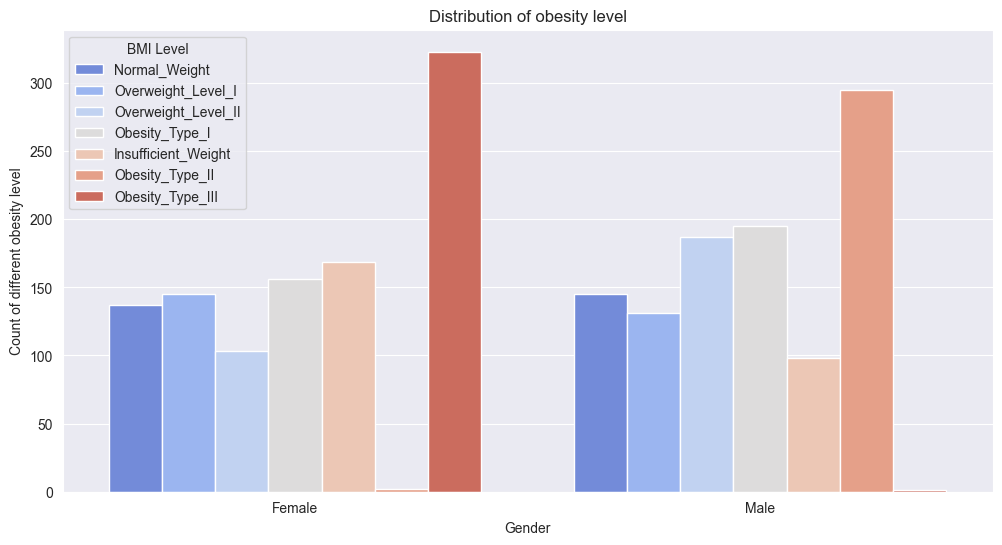

In [16]:
#Setting the size of the figure
plt.figure(figsize=(12,6))

# Creating a countplot 
sns.countplot(data=df, x='Gender', hue='BMI Level', palette='coolwarm')
plt.xlabel('Gender')
plt.ylabel('Count of different obesity level')
plt.title('Distribution of obesity level');


In [17]:
# Defining the BMI categories of interest
bmi_categories = ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 
                  'Overweight_Level_II', 'Overweight_Level_I', 
                  'Normal_Weight', 'Insufficient_Weight']

# Filtering the DataFrame for the specified BMI categories
filtered_df = df.query('`BMI Level` in @bmi_categories')

# Using crosstab to calculate the percentage of individuals in each category by gender
cross_table = pd.crosstab(filtered_df['BMI Level'], filtered_df['Gender'], normalize='index') * 100

# Displaying the cross table
cross_table

Gender,Female,Male
BMI Level,,
Insufficient_Weight,63.295880,36.704120
Normal_Weight,48.581560,51.418440
Obesity_Type_I,44.444444,55.555556
Obesity_Type_II,0.673401,99.326599
Obesity_Type_III,99.691358,0.308642
Overweight_Level_I,52.536232,47.463768
Overweight_Level_II,35.517241,64.482759


Based on the cross table displaying the percentage distribution of individuals in different BMI categories by gender, we can draw the following conclusions:

1. **Insufficient Weight**: Approximately 63.3% of individuals in the "Insufficient Weight" category are female, while around 36.7% are male.

2. **Normal Weight**: In the "Normal Weight" category, there is a relatively balanced distribution, with about 48.6% being female and 51.4% being male.

3. **Obesity Type I**: The majority, approximately 55.6%, of individuals in the "Obesity Type I" category are male, with females accounting for about 44.4%.

4. **Obesity Type II**: In the "Obesity Type II" category, an overwhelming majority of individuals, approximately 99.3%, are male, with only about 0.7% being female.

5. **Obesity Type III**: Conversely, in the "Obesity Type III" category, nearly all individuals, approximately 99.7%, are female, while only about 0.3% are male.

6. **Overweight Level I**: About 52.5% of individuals in the "Overweight Level I" category are female, and approximately 47.5% are male.

7. **Overweight Level II**: In the "Overweight Level II" category, there is a substantial male majority, with around 64.5% being male and about 35.5% being female.

These findings highlight significant gender disparities in various BMI categories. For example, "Obesity Type II" is predominantly observed in males, whereas "Obesity Type III" is overwhelmingly prevalent among females. Conversely, "Normal Weight" shows a balanced gender distribution. Understanding these gender-specific patterns can be valuable for targeted healthcare interventions and public health initiatives aimed at addressing obesity-related health issues.


##### What's the relationship between age and Obesity Level?

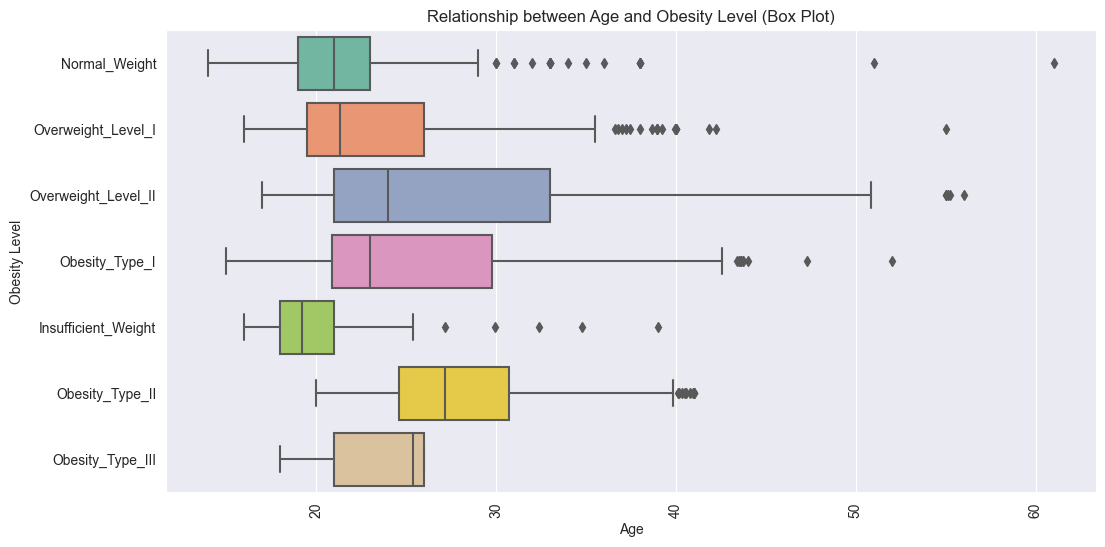

In [18]:
# Creating a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age', y='BMI Level', palette='Set2')
plt.xticks(rotation=90)
plt.xlabel('Age')
plt.ylabel('Obesity Level')
plt.title('Relationship between Age and Obesity Level (Box Plot)')
plt.show()

##### What's the relationship between Height and Obesity Level?

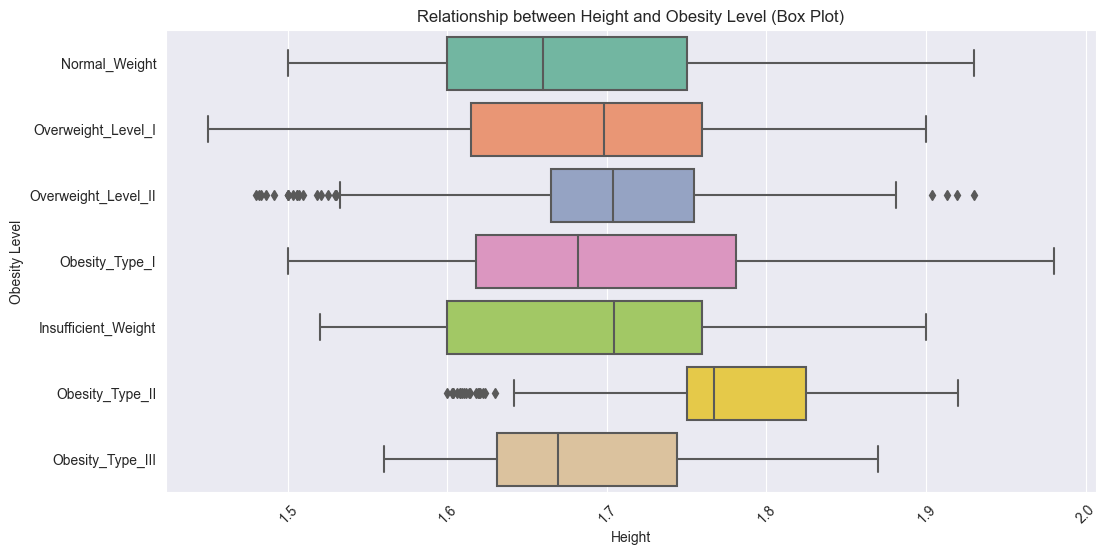

In [19]:
# Creating a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Height', y='BMI Level', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Height')
plt.ylabel('Obesity Level')
plt.title('Relationship between Height and Obesity Level (Box Plot)')
plt.show()

##### What's the relationship between Weight and Obesity Level?

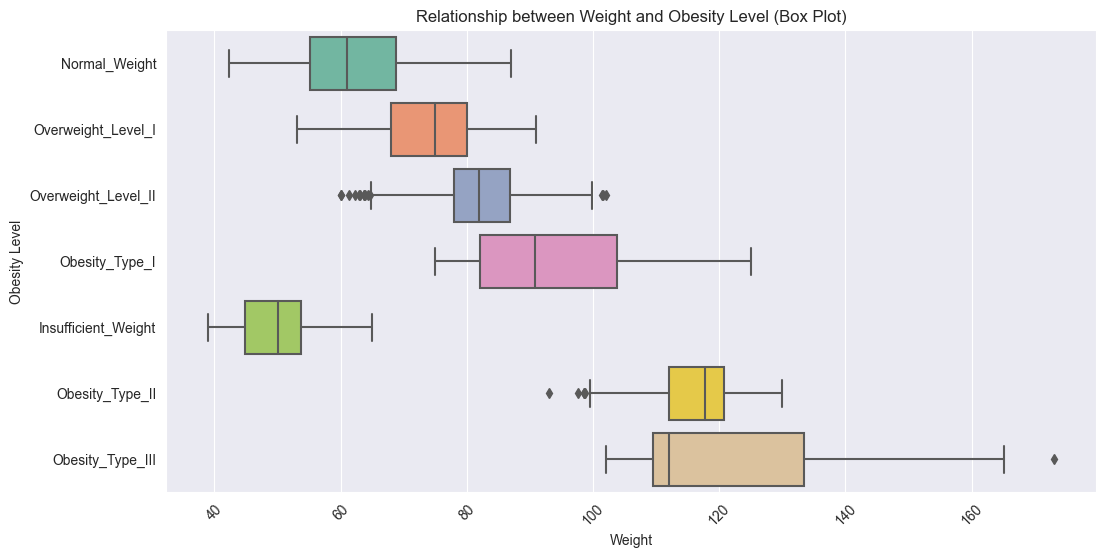

In [20]:
# Creating a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Weight', y='BMI Level', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Weight')
plt.ylabel('Obesity Level')
plt.title('Relationship between Weight and Obesity Level (Box Plot)')
plt.show()

##### What's the relationship between family_history_with_overweight and Obesity Level?

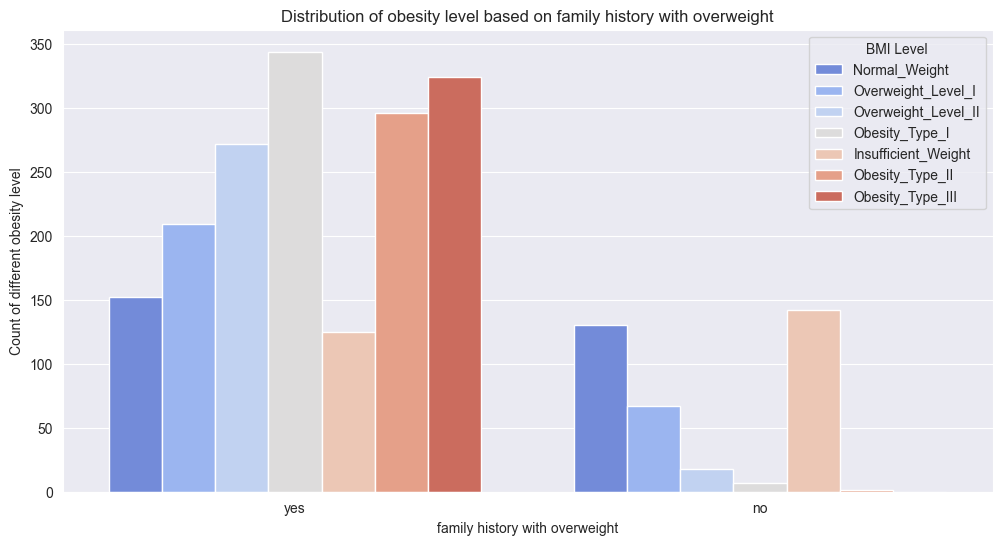

In [24]:
#Setting the size of the figure
plt.figure(figsize=(12,6))

# Creating a countplot 
sns.countplot(data=df, x='family_history_with_overweight', hue='BMI Level', palette='coolwarm')
plt.xlabel('family history with overweight')
plt.ylabel('Count of different obesity level')
plt.title('Distribution of obesity level based on family history with overweight');


##### What's the relationship between Frequent consumption of high-caloric food(FAVC) and Obesity Level?

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

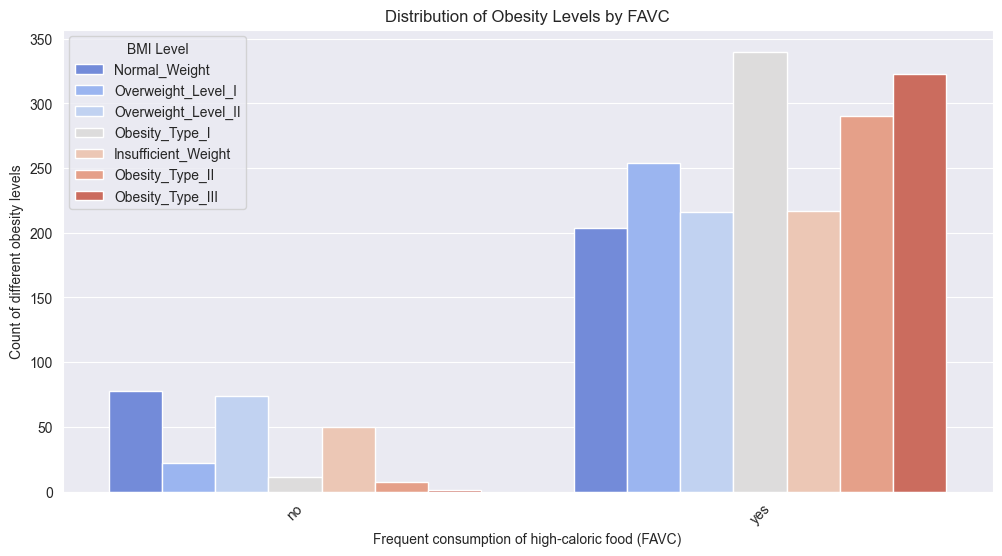

In [29]:
#Setting the size of the figure
plt.figure(figsize=(12,6))

# Creating a countplot
sns.countplot(data=df, x='FAVC', hue='BMI Level', palette='coolwarm')
plt.xlabel('Frequent consumption of high-caloric food (FAVC)')
plt.ylabel('Count of different obesity levels')
plt.title('Distribution of Obesity Levels by FAVC')
plt.xticks(rotation=45)

##### What's the relationship between Frequency of consumption of vegetables(FCVC) and Obesity Level?

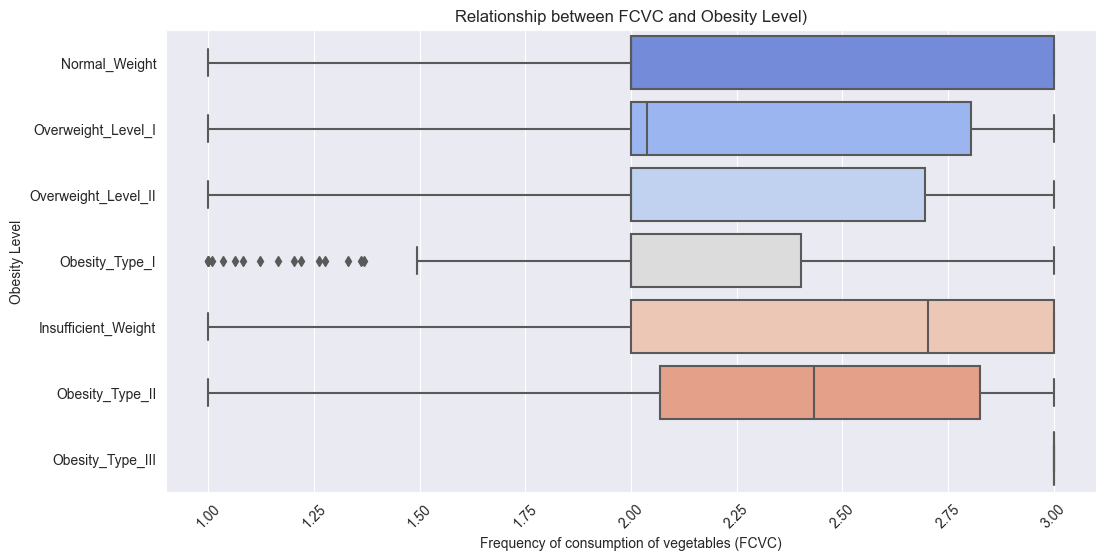

In [33]:
#Setting the size of the figure
plt.figure(figsize=(12,6))

# Creating a horizontal box plot
sns.boxplot(data=df, y='BMI Level', x='FCVC', palette='coolwarm')
plt.xlabel('Frequency of consumption of vegetables (FCVC)')
plt.ylabel('Obesity Level')
plt.title('Relationship between FCVC and Obesity Level)')
plt.xticks(rotation=45)

# Showing the plot
plt.show()

In [37]:
# Group the DataFrame by 'BMI Level' and calculate the mean of 'FCVC' for each group
average_fcvc_by_obesity_level = df.groupby('BMI Level')['FCVC'].mean().reset_index()

# Rename the columns for clarity
average_fcvc_by_obesity_level.columns = ['Obesity Level', 'Average FCVC']

# Display the table
average_fcvc_by_obesity_level

,Obesity Level,Average FCVC
0,Insufficient_Weight,2.474811
1,Normal_Weight,2.336879
2,Obesity_Type_I,2.186050
3,Obesity_Type_II,2.391284
4,Obesity_Type_III,3.000000
5,Overweight_Level_I,2.278055
6,Overweight_Level_II,2.260578


##### What's the relationship between Number of main meals(NCP) and Obesity Level?

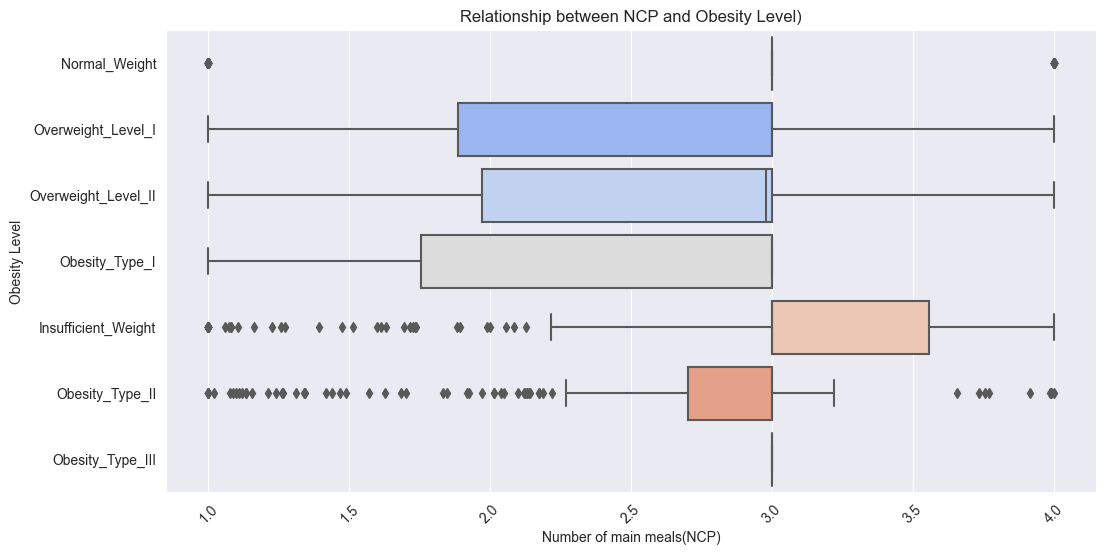

In [39]:
#Setting the size of the figure
plt.figure(figsize=(12,6))

# Creating a horizontal box plot
sns.boxplot(data=df, y='BMI Level', x='NCP', palette='coolwarm')
plt.xlabel('Number of main meals(NCP)')
plt.ylabel('Obesity Level')
plt.title('Relationship between NCP and Obesity Level)')
plt.xticks(rotation=45)

# Showing the plot
plt.show()

##### What's the relationship between Consumption of food between meals(CAEC) and Obesity Level?

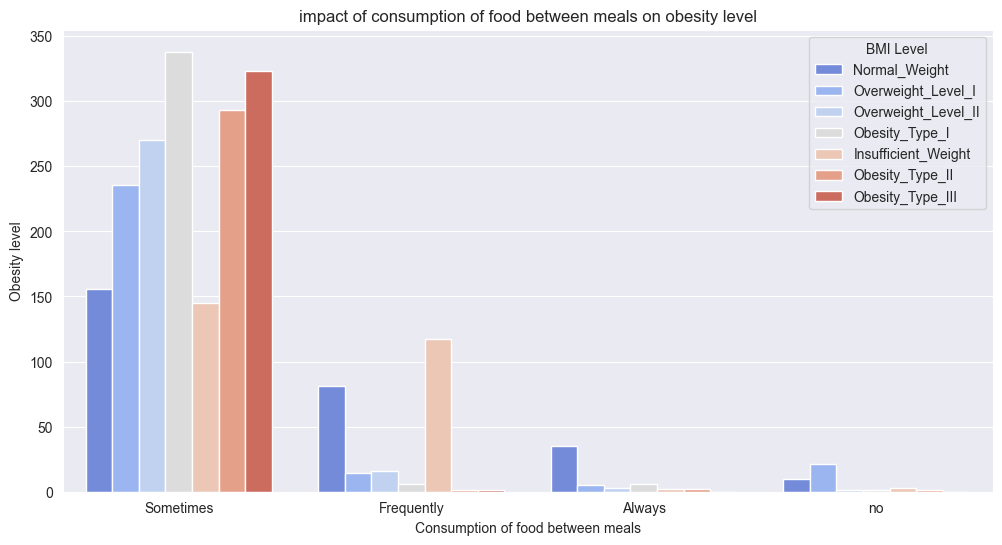

In [46]:
# Setting the size of the plot
plt.figure(figsize=(12,6))

# Ceating the plot
sns.countplot(data=df,x='CAEC',hue='BMI Level',palette='coolwarm')
plt.xlabel('Consumption of food between meals')
plt.ylabel('Obesity level')
plt.title('impact of consumption of food between meals on obesity')
plt.show()

##### What's the relationship between SMOKE and Obesity Level?

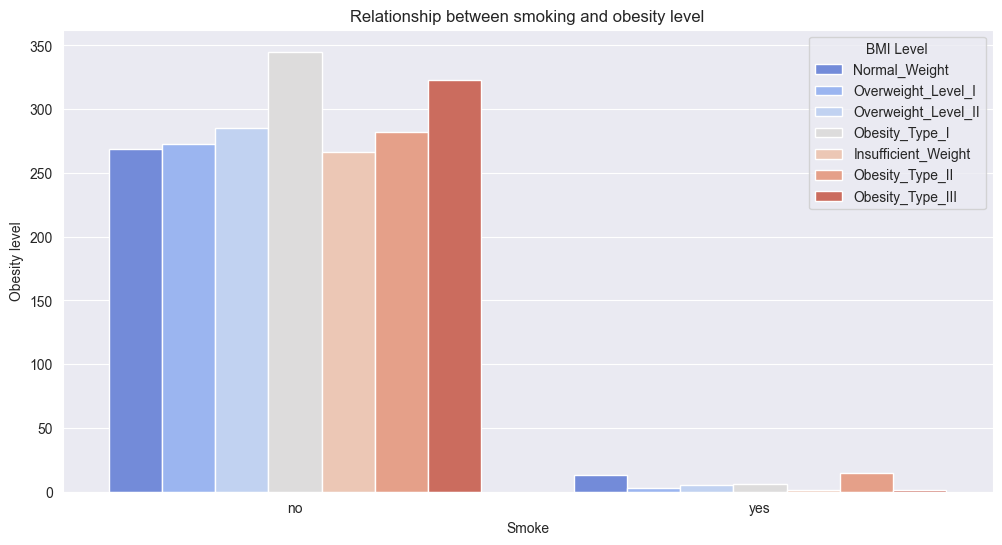

In [48]:
# Setting the size of the plot
plt.figure(figsize=(12,6))

# Ceating the plot
sns.countplot(data=df,x='SMOKE',hue='BMI Level',palette='coolwarm')
plt.xlabel('Smoke')
plt.ylabel('Obesity level')
plt.title('Relationship between smoking and obesity level')
plt.show()

##### What's the relationship between Consumption of water daily (CH20) and Obesity Level?

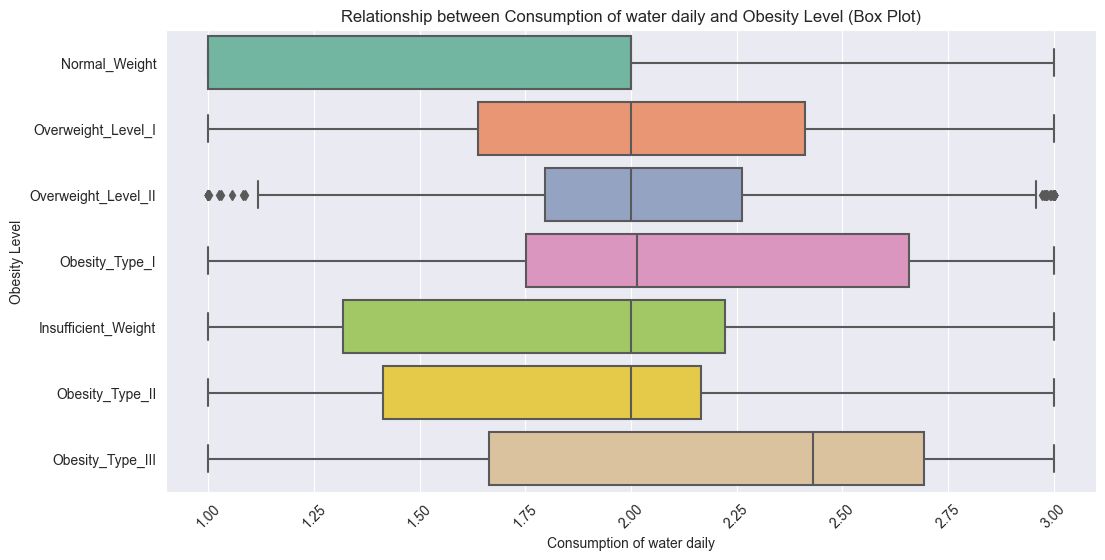

In [50]:
# Setting the figure size
plt.figure(figsize=(12,6))

# Creating the plot
sns.boxplot(data=df, x='CH2O', y='BMI Level', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Consumption of water daily')
plt.ylabel('Obesity Level')
plt.title('Relationship between Consumption of water daily and Obesity Level (Box Plot)')
plt.show()

##### What's the relationship between Calories consumption monitoring (SCC) and Obesity Level?

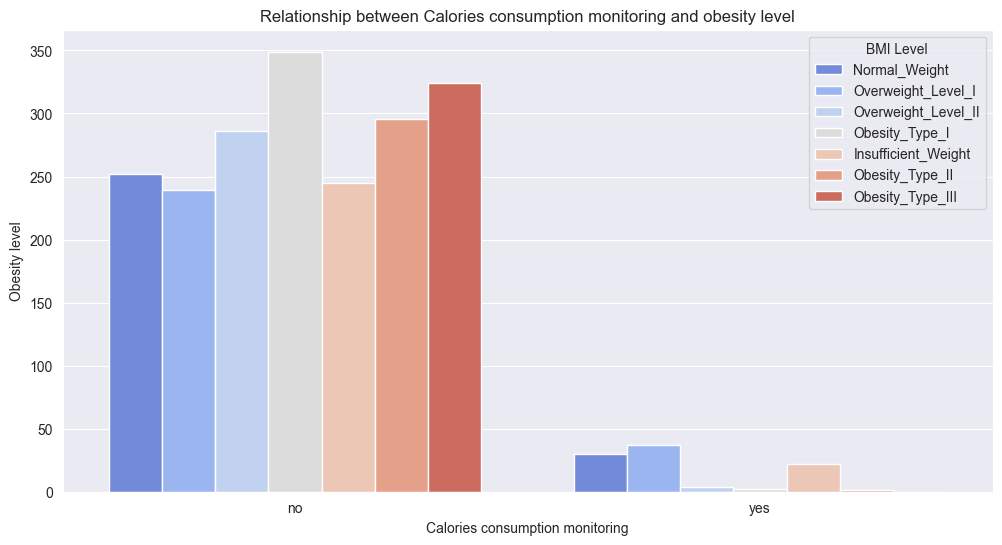

In [52]:
# Setting the size of the plot
plt.figure(figsize=(12,6))

# Ceating the plot
sns.countplot(data=df,x='SCC',hue='BMI Level',palette='coolwarm')
plt.xlabel('Calories consumption monitoring')
plt.ylabel('Obesity level')
plt.title('Relationship between Calories consumption monitoring and obesity level')
plt.show()

##### What's the relationship between Physical activity frequency (FAF) and Obesity Level?

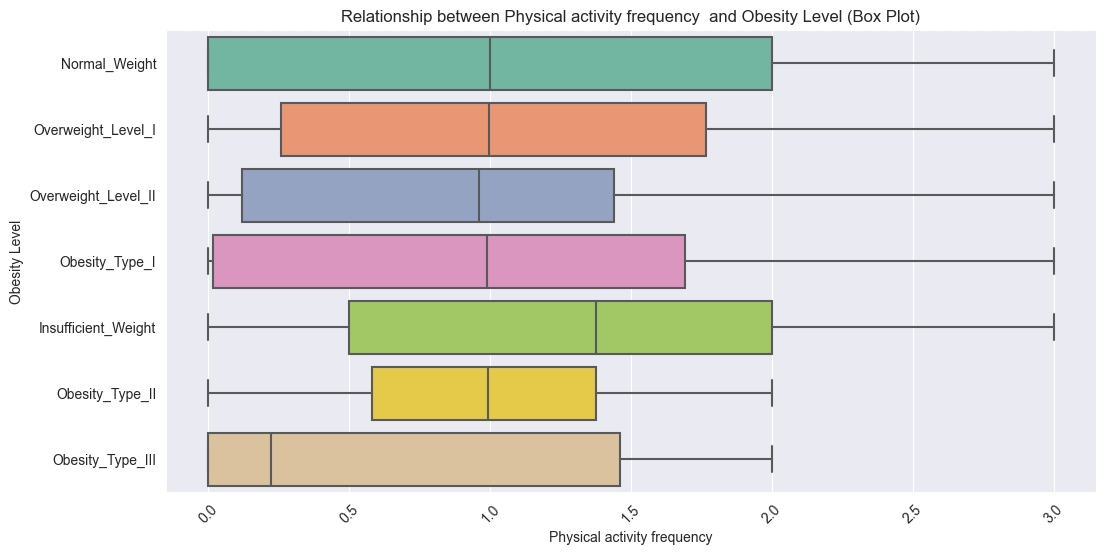

In [55]:
# Setting the figure size
plt.figure(figsize=(12,6))

# Creating the plot
sns.boxplot(data=df, x='FAF', y='BMI Level', palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Physical activity frequency')
plt.ylabel('Obesity Level')
plt.title('Relationship between Physical activity frequency  and Obesity Level (Box Plot)')
plt.show()

##### What's the relationship between Time using technology devices (TUE) and Obesity Level?

In [56]:
df['TUE'].value_counts()

TUE
0.000000    537
1.000000    289
2.000000    108
0.630866      4
1.119877      3
           ... 
1.343044      1
1.019452      1
0.673408      1
0.997600      1
0.714137      1
Name: count, Length: 1129, dtype: int64

In [57]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI Level,Numeric BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [21]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'BMI Level', 'Numeric BMI'],
      dtype='object')